<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Mouse Connectivity</h1></center>
<center><h3>Motivating Question: Where do primary visual cortex neurons project?</h3></center>

In [1]:
# drive_path is set here

drive_path = '/Users/michaelbu/Code/Connectivity/'

In [2]:
# imports!

# pandas for manipulating / viewing tables
import pandas as pd

# numpy, which needs no introduction
import numpy as np

# os for dealing with the file system
import os

# MouseConnectivityCache for downloading and storing mouse connectivity data
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# OntologiesApi
from allensdk.api.queries.ontologies_api import OntologiesApi

# display for nice notebook views
from IPython.display import display

# easy plotting
import matplotlib.pyplot as plt

In [3]:
# settings!

%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h3>Where is the primary visual area in the mouse?</h3></center>

We'll answer this question in two ways:
* relatively: We want to know which structure(s) contain the primary visual.
* absolutely: We want to know where the primary visual area is located in physical space.



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>The caching pattern:</h4>
We will be using the ```MouseConnectivityCache``` class to download and store data. This class requires from us:

* a manifest file path. This path determines where data will be stored. Once you have instantiated your cache once, you can access downloaded data again by instantiating a new cache with the same manifest path.  We will be using pre-populated data directories.
* a resolution for the data volumes that we will be downloading. The possible (isometric) resolutions are 10, 25, 50, and 100-microns, with 25 the default.

As usual, you can use the built in ```help``` function to see the complete documentation.

In [4]:
# specify your path and isometric resolution
manifest_file = os.path.join(drive_path, 'manifest.json')
resolution = 25

# instantiate the cache object
# after this step, the manifest file you specified should exist on your filesystem
mcc = MouseConnectivityCache(manifest_file=manifest_file, resolution=resolution)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>The structure tree</h4>
Anatomists at the Allen Institute have divided the adult mouse brain into ~1300 distinct structures. These are arranged in a tree, where coarsely specified structures (e.g. 'Isocortex') are near the root and finely specified structures (e.g "Primary visual area, layer 4") make up the leaves.

[Here](http://atlas.brain-map.org/atlas?atlas=1) is a handy visualization of the tree (and atlas!).

You can download and access the structure tree by calling ```get_structure_tree``` on your ```MouseConnectivityCache``` instance.

In [5]:
# get the structure tree
# this step should produce a file called 'structures.json' in the same directory as your manifest file
structure_tree = mcc.get_structure_tree()

In [6]:
# view the structure record for primary visual cortex
visp = structure_tree.get_structures_by_name(['Primary visual area'])

# the data structure returned by this method is a list of dictionaries:
visp

[{u'acronym': u'VISp',
  u'graph_id': 1,
  u'graph_order': 185,
  u'id': 385,
  u'name': u'Primary visual area',
  u'rgb_triplet': [8, 133, 140],
  u'structure_id_path': [997, 8, 567, 688, 695, 315, 669, 385],
  u'structure_set_ids': [396673091,
   112905828,
   12,
   514166994,
   184527634,
   112905813,
   114512891,
   114512892,
   167587189]}]

In [7]:
# we can make a nicer table view using pandas:
pd.DataFrame(visp)

,acronym,graph_id,graph_order,id,name,rgb_triplet,structure_id_path,structure_set_ids
0,VISp,1,185,385,Primary visual area,"[8, 133, 140]","[997, 8, 567, 688, 695, 315, 669, 385]","[396673091, 112905828, 12, 514166994, 18452763..."


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
See <a href='http://alleninstitute.github.io/AllenSDK/_static/examples/nb/reference_space.html'>here</a> for definitions of these fields. The most relevant ones for us right now are:

* id: A unique integer identifier for this structure
* name: The structure's full name
* acronym: A shortened version of the structure's name
* structure_id_path: a list of structures from the root of the tree (left) to the selected structure record.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Mapping ids to names</h4>

We can identify a structure by:
* Its id
* Its name
* Its acronym

Frequently, we want to switch between these. For instance, we might want to know the name of VISp's parent (structure 669 from the structure_id_path). The structure tree can be used to generate a map from ids to names:

In [8]:
name_map = structure_tree.get_name_map()
parent_id = structure_tree.parent_id([385])[0] # structure tree methods accept and return lists
name_map[parent_id]

u'Visual areas'

In [9]:
# The structure tree also has a built-in map for going from acronyms to ids:
acronym_to_id_map = structure_tree.get_id_acronym_map()
acronym_to_id_map['VISp']

385

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: mapping acronyms to names</h4>

Write a function with the following signature:

```python
def get_acronym_name_map(structure_tree):
    '''Builds a dictionary mapping structure acronyms to names.
    
    Parameters
    ----------
    structure_tree : StructureTree
        The complete structure tree.
        
    Returns
    -------
    acronym_name_map : dict
        Keys are acronyms (str); values are names (str).
    
    '''
    
    # your code here
    
    return acronym_name_map

```

In [10]:
def get_acronym_name_map(structure_tree):
    return structure_tree.value_map(lambda x: x['acronym'], lambda y: y['name'])

In [11]:
acronym_name_map = get_acronym_name_map(structure_tree)
acronym_name_map['VISp']

u'Primary visual area'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: where is VISp in the structure tree?</h4>

Where is the primary visual area? One way to answer this question would be to name structures containing VISp. These are:
1. Visual Areas
2. Isocortex
3. ...
4. root

In this excercise we will write a function that determines the nth ancestor of a given structure. Use the following signature:

```python
def where_in_the_tree(structure_tree, structure_name, steps=1):
    '''Names a structure which contains the supplied structure
    
    Parameters
    ----------
    structure_tree : StructureTree
        The tree in which structures will be looked up.
    structure_name : str
        The name of the structure whose ancestor we wish to find
    steps : int, optional
        How far rootward to walk. 1 gives the direct parent.
        
    Returns
    -------
    ancestor_name : str
        The full name of the requested ancestor structure.
    
    Examples
    --------
    >>>where_in_the_tree(structure_tree, 'Primary visual area', 2)
    u'Isocortex'
    >>>where_in_the_tree(structure_tree, 'Hippocampal formation', 0)
    u'Hippocampal formation'
    >>>where_in_the_tree(structure_tree, 'Cerebrum', 10000)
    None
    '''
    
    # your code here
    
    return ancestor_name

```

In [12]:
def where_in_the_tree(structure_tree, structure_name, steps=1):    
    
    if structure_name in structure_tree.get_name_map().values():
        structure = structure_tree.get_structures_by_name([structure_name])[0]
    else:
        raise ValueError('structure \"{0}\" not found'.format(structure_name))
        
    for step in range(steps):
        structure = structure_tree.parent([structure['id']])[0]
        
        if structure is None:
            return
        
    return structure['name']

In [13]:
print where_in_the_tree(structure_tree, 'Primary visual area', 2)
print where_in_the_tree(structure_tree, 'Hippocampal formation', 0)

Isocortex
Hippocampal formation


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Working in 3d space</h4>

<p>Anatomic variability across mice is a fundamental problem for our connectivity dataset. How can we ask questions about VISp if its location, size, and shape are different on every brain?

<p>We resolved this issue by generating an average template volume from 1675 mouse brain image stacks and registering each of our connectivity datasets to this average template. This allows us to work in a shared 3d space, which we call the Common Coordinate Framework

<p>You can view the average template volume using your MouseConnectivityCache:

</div>

(528, 320, 456)


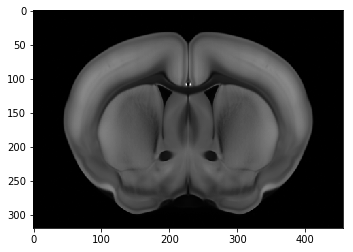

In [14]:
# load up the average template
template, header = mcc.get_template_volume()

# recall that this cache is at 25 micron isometric resolution
plt.imshow(template[200, :, :], interpolation='none', cmap=plt.cm.gray)

# how big?
print template.shape

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
The template is oriented:
* anterior -> posterior
* superior -> inferior
* left -> right

This means that to obtain a sagittal view, we must slice along axis 2:

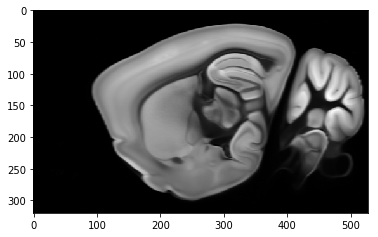

In [15]:
plt.imshow(template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
and along axis 1 for a horizontal section:

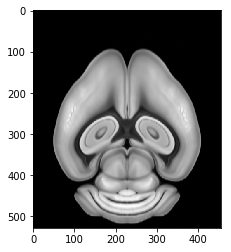

In [16]:
plt.imshow(template[:, 75, :], interpolation='none', cmap=plt.cm.gray)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>The annotation volume</h4>

Each (brain) voxel in the CCF is associated with a structure in the structure tree. This mapping is recorded in the annotation volume, which occupies the same space as the average template. The value of each voxel in the annotation volume is the id of the most specific structure occupying that point in space.

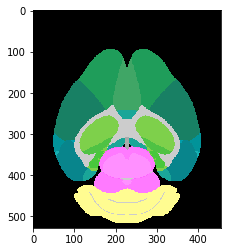

In [17]:
# you can obtain a reference space object from your mouse connectivity cache
# this object handles tasks that require both a structure tree and an annotation volume
reference_space =  mcc.get_reference_space()

# One such task is to apply our predefined structure colors to 
# a slice from the annotation volume
slice_image = reference_space.get_slice_image(1, 1875) # this method wants an axis and a position in microns
plt.imshow(slice_image, interpolation='none')

In [18]:
# you can load up the raw annotation using your MouseConnectivityCache
annotation, _ = mcc.get_annotation_volume()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We want to find VISp, whose structure id is 385. How about:

In [19]:
np.where(annotation == 385)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Why did nothing show up? Recall that the annotation only labels the finest structure division at each voxel. VISp has several substructures:

In [20]:
visp_children = structure_tree.children([385])[0]
display(pd.DataFrame(visp_children))

,acronym,graph_id,graph_order,id,name,rgb_triplet,structure_id_path,structure_set_ids
0,VISp6a,1,190,33,"Primary visual area, layer 6a","[8, 133, 140]","[997, 8, 567, 688, 695, 315, 669, 385, 33]","[184527634, 396673091, 12]"
1,VISp6b,1,191,305,"Primary visual area, layer 6b","[8, 133, 140]","[997, 8, 567, 688, 695, 315, 669, 385, 305]","[184527634, 396673091, 12]"
2,VISp1,1,186,593,"Primary visual area, layer 1","[8, 133, 140]","[997, 8, 567, 688, 695, 315, 669, 385, 593]","[184527634, 396673091, 12]"
3,VISp4,1,188,721,"Primary visual area, layer 4","[8, 133, 140]","[997, 8, 567, 688, 695, 315, 669, 385, 721]","[184527634, 396673091, 12]"
4,VISp5,1,189,778,"Primary visual area, layer 5","[8, 133, 140]","[997, 8, 567, 688, 695, 315, 669, 385, 778]","[184527634, 396673091, 12]"
5,VISp2/3,1,187,821,"Primary visual area, layer 2/3","[8, 133, 140]","[997, 8, 567, 688, 695, 315, 669, 385, 821]","[184527634, 396673091, 12]"


In [21]:
# VISp, like other cortical structures, is subdivided into layers. 
# Voxels are directly assigned to the layer structures instead of to VISp
np.where(annotation==821) # 821 <==> VISp layer 2/3

(array([308, 308, 308, ..., 410, 410, 410]),
 array([28, 28, 28, ..., 78, 78, 78]),
 array([123, 124, 125, ..., 116, 340, 341]))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
A couple of caveats regarding the annotation:
1. It is possible for a structure and its substructures to all be directly annotated. An example would be hypothalamus, which has nuclei labeled where and only where they are distinctly identifiable.
2. Not all structures in the structure tree are annotated or have annotated substructures.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Structure masks</h4>

The annotation volume and structure tree contain a lot of information in a compact form. It can be simpler to work with more explicit representations of individual structures. We often use binary indicator masks for specific structures. These are:

* volumes in the common coordinate framework
* 1 where the annotation is labeled with a structure or its descendants, otherwise 0

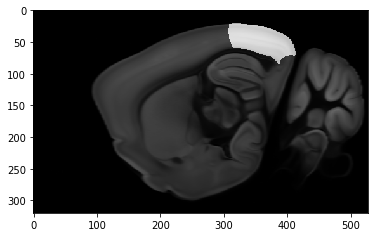

In [22]:
# view a structure mask for VISp
visp_mask, _ = mcc.get_structure_mask(385)
plt.imshow(visp_mask[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)
plt.imshow(template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray, alpha=0.4)

In [23]:
# we can now easily locate VISp-labeled voxels in space:
np.where(visp_mask)

(array([307, 307, 307, ..., 414, 414, 414]),
 array([23, 23, 24, ..., 78, 78, 78]),
 array([121, 335, 119, ..., 338, 339, 340]))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
It is easy to mask out data. The following syntax will do:

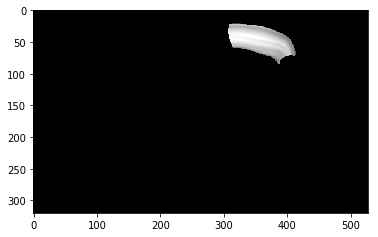

In [24]:
visp_template = template.copy()

# we use 0 here for the masked value because pyplot.imshow doesn't play nice with nan.
# This is not necessarily the right choice for your application!
visp_template[visp_mask == 0] = 0
plt.imshow(visp_template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

In [25]:
# We can now ask questions about the template while restricting our inquiry to VISp
# for instance, to find the mean voxelwise template intensity within visp:
visp_template.sum() / np.count_nonzero(visp_mask)

175.91918583829698

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: Regional template statistics</h4>

Write a function that computes percentiles of average template intensities in selected structures. Use it to compare the median intensity in white and gray matter.


hint: check out [numpy's percentile function](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html)


```python
def get_template_intensity_percentiles(mouse_connectivity_cache, structure_ids, n=None):
    '''Computes the nth percentile(s) of the average template volume's intensity within a particular subset of structures.
    
    Parameters
    ----------
    mouse_connectivity_cache : MouseConnectivityCache
    structure_ids : array-like of int
    n : array-like of float, optional
    
    Returns
    -------
    percentiles : array-like of float
        The nth percentiles. Uses the lower value when a percentile falls between two data.
    
    '''
    
    # your code here
    
    return percentiles
    
```

In [26]:
def get_median_template_intensity(mouse_connectivity_cache, structure_ids):
    
    mask = mouse_connectivity_cache.get_reference_space().make_structure_mask(structure_ids)
    template, _ = mouse_connectivity_cache.get_template_volume()
                        
    return np.percentile(template[mask > 0].flat, 50, interpolation='lower')

In [27]:
# find the appropriate ids
structure_tree.get_structures_by_name(['fiber tracts', 'Basic cell groups and regions'])

[{u'acronym': u'grey',
  u'graph_id': 1,
  u'graph_order': 1,
  u'id': 8,
  u'name': u'Basic cell groups and regions',
  u'rgb_triplet': [191, 218, 227],
  u'structure_id_path': [997, 8],
  u'structure_set_ids': [112905828,
   12,
   184527634,
   112905813,
   114512891,
   114512892]},
 {u'acronym': u'fiber tracts',
  u'graph_id': 1,
  u'graph_order': 1084,
  u'id': 1009,
  u'name': u'fiber tracts',
  u'rgb_triplet': [204, 204, 204],
  u'structure_id_path': [997, 1009],
  u'structure_set_ids': [184527634, 167587189]}]

In [28]:
gm = get_median_template_intensity(mcc, [8])
wm = get_median_template_intensity(mcc, [1009])

print 'gray: ' + str(gm)
print 'white: ' + str(wm)

gray: 152
white: 48


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h3>Which experiments have injections into VISp?</h3></center>

Now that we have located primary visual cortex in the ontology tree and in physical space, we are ready to look at some connectivity experiments.
<br>On http://connectivity.brain-map.org you can do a <i>source search</i> to list experiments by the region into which viral tracer was injected. It is possible to do a similar search programmatically using the SDK.

In [29]:
# get a table of VISp experiments. This is a list of dictionaries.
visp_experiments = mcc.get_experiments(injection_structure_ids=[385])

# get a count
print len(visp_experiments)

203


In [30]:
# look at one of them
visp_experiments[150]

{u'gender': u'M',
 u'id': 482640524,
 u'injection-coordinates': [8770, 830, 4000],
 u'injection-structures': [{u'abbreviation': u'VISp',
   u'color': u'08858C',
   u'id': 385,
   u'name': u'Primary visual area'},
  {u'abbreviation': u'VISpm',
   u'color': u'08858C',
   u'id': 533,
   u'name': u'posteromedial visual area'},
  {u'abbreviation': u'RSPd',
   u'color': u'1AA698',
   u'id': 879,
   u'name': u'Retrosplenial area, dorsal part'},
  {u'abbreviation': u'RSPagl',
   u'color': u'1AA698',
   u'id': 894,
   u'name': u'Retrosplenial area, lateral agranular part'}],
 u'product-id': 36,
 u'strain': u'',
 u'structure-abbrev': u'VISp',
 u'structure-color': u'08858C',
 u'structure-id': 385,
 u'structure-name': u'Primary visual area',
 u'transgenic-line': u'Scnn1a-Tg3-Cre'}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Some particularly important fields here:
* id : Like structures, each experiment has a unique id.
* injection-structures : This is a list of structures that overlapped the injection site. VISp comes first, indicating that it overlapped most heavily. We call VISp the "primary injection site" for this experiment.
* transgenic-line : Is this a wildtype mouse, or is fluorescence genetically restricted to a subset of neurons? This mouse is of the Scnn1a-Tg3 line. If it were wildtype, this field would be an empty string.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
<h4> Website/SDK Exercise: Locate an experiment on the website using the experiment id</h4>

Find the experiment above on http://connectivity.brain-map.org and verify that the primary injection structures and transgnic line information matches what you see here.

<i>The easiest way to do this is to click on any experiment and open its "info" tab by clicking on the i in the top right corner. In the new window that opens up after clicking, paste your experiment id in place of the existing experiment id

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; "><h4> Website/SDK Exercise: Find the number of VISp injection experiments that have been performed.</h4>
<br>Verify that you get the same answer using a website search and using the SDK

<i>This question can be answered either by doing a source search on http://connectivity.brain-map.org or using len(visp_experiments)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: Transgenic line counts</h4>

Many of our projection experiments are carried out in transgenic mice. Infected neurons in these mice fluoresce only if they also express a specific gene. Determine how many VISp experiments were carried out in each transgenic line.

note: we use an empty string for wildtype

In [31]:
line_counts = {}
for exp in visp_experiments:
    
    tr = exp['transgenic-line']
    
    if tr == '':
        tr = 'wildtype'
    
    if tr not in line_counts:
        line_counts[tr] = 1
    else:
        line_counts[tr] += 1

In [32]:
line_counts

{u'A930038C07Rik-Tg1-Cre': 18,
 u'Ai75(RCL-nT)': 13,
 u'Calb2-IRES-Cre': 1,
 u'Chrna2-Cre_OE25': 5,
 u'Cort-T2A-Cre': 1,
 u'Crh-IRES-Cre (BL)': 1,
 u'Ctgf-2A-dgCre': 1,
 u'Cux2-IRES-Cre': 20,
 u'Drd3-Cre_KI196': 1,
 u'Efr3a-Cre_NO108': 4,
 u'Emx1-IRES-Cre': 18,
 u'Erbb4-2A-CreERT2': 1,
 u'Etv1-CreERT2': 1,
 u'Gad2-IRES-Cre': 1,
 u'Gng7-Cre_KH71': 1,
 u'Gpr26-Cre_KO250': 2,
 u'Htr3a-Cre_NO152': 1,
 u'Nos1-CreERT2': 3,
 u'Nr5a1-Cre': 7,
 u'Ntsr1-Cre_GN220': 15,
 u'Oxtr-Cre_ON66': 1,
 u'Plxnd1-Cre_OG1': 1,
 u'Pvalb-IRES-Cre': 1,
 u'Rbp4-Cre_KL100': 15,
 u'Rorb-IRES2-Cre': 3,
 u'Scnn1a-Tg3-Cre': 10,
 u'Sepw1-Cre_NP39': 2,
 u'Sst-IRES-Cre': 1,
 u'Syt6-Cre_KI148': 5,
 u'Tlx3-Cre_PL56': 15,
 u'Trib2-2A-CreERT2': 2,
 u'Vip-IRES-Cre': 1,
 'wildtype': 31}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; "><h4> Website/SDK Exercise: Find the number of VISp injection experiments that have been performed.</h4>
<br>Cross-check <b>one</b> of these transgenic line experiment counts with what you find on the Allen Institute website

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h3>Gridded projection data</h3></center>

Since each connectivity experiment is registered to the CCF, we can load connectivity data in the same way as we do the average template or annotation volume.

Here we will load an experiment's projection density volume. These data:
* are floats in [0, 1]
* represent the fraction of each voxel that is occupied by signal (as detected in the segmentation stage)
* are independent of the injection site (so it makes sense to discuss "projection in the injection site")

In [33]:
prdens, _ = mcc.get_projection_density(159550125)

In [34]:
def axis_proj(data, template, axis, bg_q=90, bg_alpha=0.5):
    # let's make some pictures
    
    data_max = np.amax(data, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)
    
    plt.imshow(data_max, interpolation='none', cmap=plt.cm.afmhot)
    plt.imshow(template_bg, interpolation='none', cmap=plt.cm.gray, alpha=0.5)

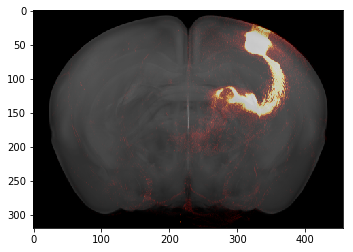

In [35]:
# make a max projection along the anterior-posterior axis for visualization
axis_proj(prdens, template, 0)

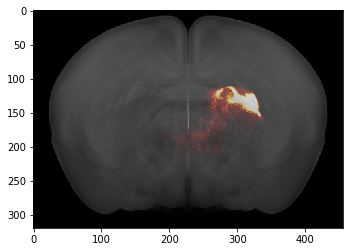

In [36]:
# now filter the signal to thalamus
thalamus_mask, _ = mcc.get_structure_mask(549)

prdens_th = prdens.copy()
prdens_th[thalamus_mask == 0] = 0
axis_proj(prdens_th, template, 0)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Another useful data volume is the injection fraction. This shows the fraction of each voxel that lies within this experiment's manually annotated injection site

In [37]:
ijfr, _ = mcc.get_injection_fraction(159550125)

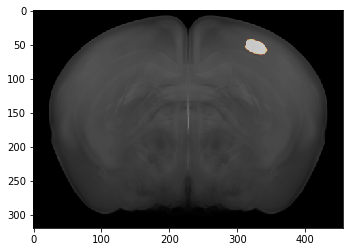

In [38]:
axis_proj(ijfr, template, 0)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: Structure-level density</h4>

Write a function that determines the density of signal within a structure (i.e. the fraction of pixels in all the voxels in that structure that were detected as signal). 

In this experiment, what is the density in VISp? What about thalamus?

```python
def fraction_of_structure(mouse_connectivity_cache, structure_id, experiment_id):
    '''Computes the fraction of pixels in a specified structure that were detected as signal.

    Parameters
    ----------
    mouse_connectivity_cache : MouseConnectivityCache
    structure_id : int
    experiment_id : int

    Returns
    -------
    fraction : float

    '''
    
    # your code here

    return fraction

```

In [39]:
def fraction_of_structure(mouse_connectivity_cache, structure_id, experiment_id):
    
    mask, _ = mouse_connectivity_cache.get_structure_mask(structure_id)
    
    if mask.sum() == 0:
        return 0.0
    
    projection_density, _ = mouse_connectivity_cache.get_projection_density(experiment_id)
    projection_density[mask == 0] = 0
    
    fraction = projection_density.sum() / mask.sum()
    return fraction


In [40]:
print 'thalamus', fraction_of_structure(mcc, 549, 159550125)
print 'VISp', fraction_of_structure(mcc, 385, 159550125)

thalamus 0.0243761871437
VISp 0.075735709711


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h3>Which structures recieve the most projections from VISp?</h3></center>

In order to answer this question you will need a set of structurewise projection summaries. One way to obtain these summary values would be to apply functions like the one you made in the previous excercise across a wider range of structures and experiments. This would be quite time-consuming, so we have precomputed such values for all experiments and structures.

We call these structurewise summary records "unionizes." Each unionize summarizes projection data over a unique (though potentially overlapping) spatial domain. Here are some unionize records:

In [41]:
sample_experiment = 159550125

unionizes = mcc.get_structure_unionizes(experiment_ids=[sample_experiment])
unionizes.head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,1,532823925,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000,0.000000,159550125,526157196,7.415590e+09,4.711680e+07,0.0,0.0,0.057718
1,1,532823569,False,0.251098,5500,7150,3300,0.000349,0.000176,0.042345,240.618,0.000056,159550125,639,4.165810e+10,2.580530e+08,10927100.0,45412.8,0.316115
2,1,532823815,False,0.144525,610,5800,5070,0.001465,0.000108,0.023410,216.215,0.000233,159550125,1016,1.202290e+11,1.760170e+09,41206500.0,190581.0,2.156210
3,1,532823422,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000,0.000000,159550125,377,5.533910e+09,3.101040e+07,0.0,0.0,0.037988
4,3,532825286,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000,0.000000,159550125,1010,3.633940e+10,1.636920e+08,0.0,0.0,0.200523


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Each row in this table is a different unionize record. Some of the columns tell you what spatial domain the unionize record summarizes over:
* structure_id : Which structure does the unionize summarize over?
* hemisphere_id* : Does the unionize summarize over the left hemisphere, the right, or both?
* is_injection : Does the unionize correspond the the part of this structure which is within the injection site?

The "experiment_id" column identifies the experiment from which this unionize's data was drawn. This is not to be confused (!) with the "id" column, which is a unique identifier for this specific unionize record.

All of the other fields are summaries of data. You can find a reference for these [here](http://alleninstitute.github.io/AllenSDK/unionizes.html).

*the hemisphere ids are: 1 => left, 2 => right, 3 => both

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: Unionizes from VISp experiments</h4>

Get all of the unionizes for all VISp experiments into wild type mice. How many are there?

In [42]:
wt_visp_experiment_ids = [exp['id'] for exp in visp_experiments if exp['transgenic-line'] == '']
wt_visp_unionizes = mcc.get_structure_unionizes(wt_visp_experiment_ids)
print wt_visp_unionizes.shape

(70099, 19)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>A nonoverlapping set of structures</h4>

A question like "which structures recieve the most projections from VISp" don't make much sense across the whole tree - some structures contain others and will therefore end up higher on the list.

We've created a nonoverlapping list of 293 biologically relevant structures, which we call the "summary structures." You can download a list of summary structures using the ontologies api:

In [43]:
# get the summary structure set
# this is a set of ~293 nonoverlapping structures selected for 
# biological relevance
oapi = OntologiesApi()
summary_structures = oapi.get_structures(structure_set_names="'Mouse Connectivity - Summary'")
summary_structure_ids = [item['id'] for item in summary_structures]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: Filter VISp unionizes to the summary structure set</h4>

Generate a filtered set of unionizes that only includes those where the structure is a summary structure.

Hint: pandas.Series has an isin method

In [44]:
wt_visp_summary_unionizes = wt_visp_unionizes[wt_visp_unionizes['structure_id'].isin(summary_structure_ids)]
print wt_visp_summary_unionizes.shape

(27461, 19)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: Seperate injection and noninjection unionizes</h4>

Signal from within the injection site has a very different interpretation from that without. In the former case, the signal comes from infected cell bodies and their local processes, while in the latter it is from their medium- to long-range projections. We can use the is_injection field to seperate our unionizes into an injection and a noninjection set.

In [45]:
wt_visp_summary_projection_unionizes = wt_visp_summary_unionizes[wt_visp_summary_unionizes['is_injection'] == False]
wt_visp_summary_injection_unionizes = wt_visp_summary_unionizes[wt_visp_summary_unionizes['is_injection'] == True]

print wt_visp_summary_projection_unionizes.shape

(27249, 19)


In [46]:
# When we have multiple conditions on a pandas dataframe, they can be chained together in a single slice

wt_visp_summary_projection_unionizes = wt_visp_unionizes[(wt_visp_unionizes['is_injection'] == False)
                                                   & (wt_visp_unionizes['structure_id'].isin(summary_structure_ids))]

print wt_visp_summary_projection_unionizes.shape

(27249, 19)


In [47]:
# We can now easily find the mean projection strength in all summary structures from all of the wild type experiments
# by using the pandas function groupby on our dataframe containing projection unionizes data for summary structures

wt_mean_proj_density = wt_visp_summary_projection_unionizes.groupby('structure_id', as_index = False)[
    'projection_density'].mean()
print(len(wt_mean_proj_density))
wt_mean_proj_density.head()

293


,structure_id,projection_density
0,1,0.000323
1,4,0.000097
2,7,0.000009
3,12,0.000030
4,15,0.000366


In [48]:
# Print the names of the top 20 targets of VISp using name_map and the pandas sort_values function

top20_density = wt_mean_proj_density.sort_values(by = 'projection_density', ascending = False)[:20]
top20_density['name'] = [name_map[stid] for stid in top20_density['structure_id']]
print(top20_density['name'])

127                                  Lateral visual area
47         Dorsal part of the lateral geniculate complex
50        Ventral part of the lateral geniculate complex
121                                  Primary visual area
132                           Posterolateral visual area
7      Intergeniculate leaflet of the lateral genicul...
291                              Laterointermediate area
172                           Nucleus of the optic tract
96                                 Subgeniculate nucleus
125                            Anterolateral visual area
292                                      Postrhinal area
66             Lateral posterior nucleus of the thalamus
129                            Rostrolateral visual area
149                            posteromedial visual area
43                    Lateral dorsal nucleus of thalamus
187                            Olivary pretectal nucleus
123                             Anteromedial visual area
64                            A

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; "><h4> Excercise: Comparing projection density and projection volume</h4>

Find the top 20 targets of VISp by normalized projection volume. 
* Are these regions different from the top 20 targets by density?
* Which targets are different?
* Which gives us the correct answer for the top 20 projection targets of primary visual cortex?

In [49]:
wt_mean_proj_volume = wt_visp_summary_projection_unionizes.groupby('structure_id', as_index = False)[
    'normalized_projection_volume'].mean()
top20_volume = wt_mean_proj_volume.sort_values(by = 'normalized_projection_volume', ascending = False)[:20]
top20_volume['name'] = [name_map[stid] for stid in top20_volume['structure_id']]

diff = top20_density.merge(top20_volume, indicator = True, how='outer')
print(diff[['name', '_merge']])
print('left = density, right = volume')

                                                 name      _merge
0                                 Lateral visual area        both
1       Dorsal part of the lateral geniculate complex        both
2      Ventral part of the lateral geniculate complex        both
3                                 Primary visual area        both
4                          Posterolateral visual area        both
5   Intergeniculate leaflet of the lateral genicul...   left_only
6                             Laterointermediate area        both
7                          Nucleus of the optic tract   left_only
8                               Subgeniculate nucleus   left_only
9                           Anterolateral visual area        both
10                                    Postrhinal area        both
11          Lateral posterior nucleus of the thalamus        both
12                          Rostrolateral visual area        both
13                          posteromedial visual area        both
14        

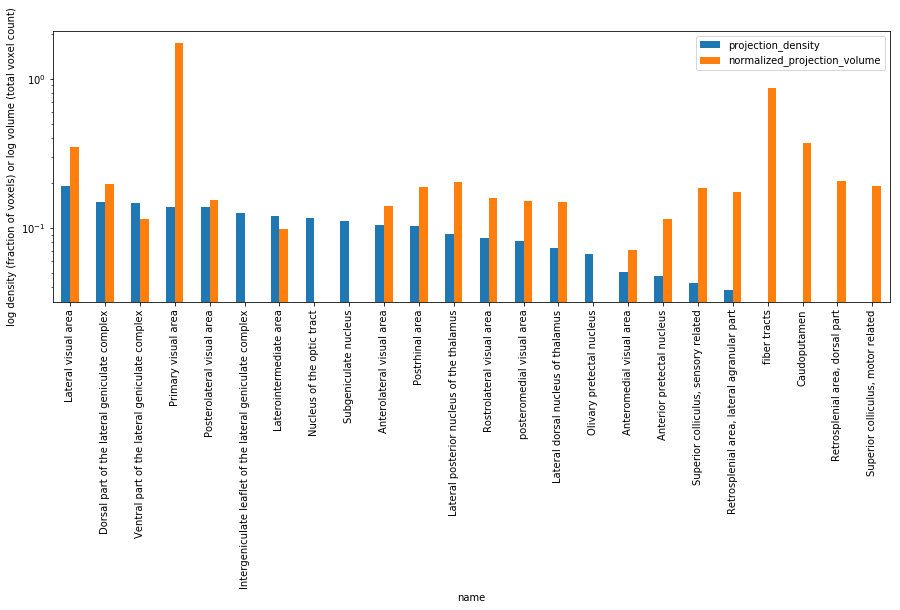

In [50]:
# We can visualize this data with a bar plot
fig = diff.plot.bar('name', ['projection_density', 'normalized_projection_volume'], figsize = (15, 5))
fig.set_ylabel('log density (fraction of voxels) or log volume (total voxel count)')
fig.set_yscale('log')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: Summarizing across experiments</h4>

Write a function that computes a summary statistic across all experiments within a particular spatial domain. Pick a non-VISp structure and evaluate the normalized projection volume (volume of projection signal / volume of injection signal) in that structure across all VISp experiments in wild type mice.

hint: passing a function as an argument seems weird, but you can actually just call the resulting object. For instance, in the below signature calling fn(x) is equivalent to calling np.mean(x)

```python
def signal_summary(unionizes, structure_id, hemisphere_id, is_injection, signal_key, fn=np.mean):
    '''Applies a function to all unionizes describing a specified spatial domain.
    
    Parameters
    ----------
    unionizes : pd.DataFrame
    structure_id : int
        filter unionizes by structure
    hemisphere_id : int
        filter unionizes by hemisphere
    is_injection : bool
        filter unionizes by injection status
    signal_key : str
        select this column from the data
    fn : function, optional
        apply this function to the values of the resulting pandas series. Defaults to np.mean.
    
    Returns
    -------
    summary : numeric
        output of fn on filtered unionizes
    
    '''
 
    # code here
    
    return summary

```

In [51]:
def signal_summary(unionizes, structure_id, hemisphere_id, is_injection, signal_key, fn=np.mean):
    return fn(unionizes[(unionizes['structure_id'] == structure_id) 
                        & (unionizes['hemisphere_id'] == hemisphere_id)
                        & (unionizes['is_injection'] == is_injection)][signal_key])


In [52]:
signal_summary(wt_visp_unionizes, 170, 3, False, 'normalized_projection_volume')

0.2936064064516129

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: projection pattern comparisons</h4>

Use the grid and/or unionize data to run a comparison of projection patterns between experiments varying along axes of your choice. Some options:

* cre line
* injection hemisphere
* primary injection structure
* secondary injection structures, given a common primary injection structure

As outputs you might look at:
* which structures are projected to
* are projections equally strong across hemispheres? 
* do projections preferentially end up in subregions of the target structures? Can these subregions be identified as substructures in the tree, or only geographically?
* Which regions are the most or least variably projected to by projections from a particular source?

In [53]:
cux2_visp_experiment_ids = [exp['id'] for exp in visp_experiments if exp['transgenic-line'] == 'Cux2-IRES-Cre']
cux2_visp_unionizes = mcc.get_structure_unionizes(cux2_visp_experiment_ids)

In [54]:
left_volume = np.zeros(annotation.shape)
right_volume = np.zeros(annotation.shape)
valid_cux2 = 0
valid_wt = 0

lr_mid = int(np.around(left_volume.shape[2] / 2))

for ex in visp_experiments:
    
    if ex['transgenic-line'] == 'Cux2-IRES-Cre':
        try:
            prd, _ = mcc.get_projection_density(ex['id'])
            left_volume += prd
            valid_cux2 += 1
        except:
            continue
        
    elif ex['transgenic-line'] == '':
        try:
            prd, _ = mcc.get_projection_density(ex['id'])
            right_volume += prd
            valid_wt += 1
        except:
            continue
left_volume = left_volume / valid_cux2
right_volume = right_volume / valid_wt

average projections from Cux2-Cre experiments, n = 20


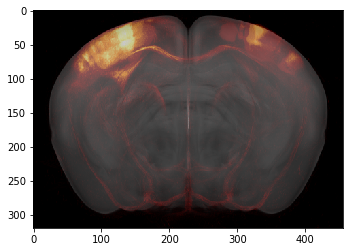

In [55]:
print('average projections from Cux2-Cre experiments, n = %s' %valid_cux2)
axis_proj(left_volume, template, 0)

average projections from wild type experiments, n = 31


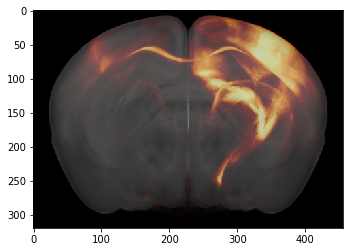

In [56]:
print('average projections from wild type experiments, n = %s' %valid_wt)
axis_proj(right_volume, template, 0)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3><center>Additional excercises</center></h3>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; ">
<h4> Excercise: most recent common ancestor</h4>

The goal of this excercise is to write a function with the following signature:

```python
def get_most_recent_common_ancestor(structure_tree, structure_ids):
    '''Finds the most leafward structure that is an ancestor (inclusive) of a set of supplied structures.
    
    Parameters
    ----------
    structure_tree : StructureTree
        The complete structure tree.
    structure_ids : list of int
        One or more structure identifiers 
    
    Returns
    -------
    common_ancestor_id : int
        Structure id of the most specific ancestor of all supplied structures.
    
    Examples
    --------
    >>> get_most_recent_common_ancestor(structure_tree, [385, 425])
    669
    >>> get_most_recent_common_ancestor(structure_tree, [315])
    315
    >>> get_most_recent_common_ancestor(structure_tree, [])
    None
    
    '''

    # your code here

    return common_ancestor_id
```

Hint: see StructureTree.ancestor_ids. How are the ids returned by this function ordered?

In [57]:
# a possible solution

def get_most_recent_common_ancestor(structure_tree, structure_ids):

    if len(structure_ids) == 0:
        return None
    
    ancestor_ids = structure_tree.ancestor_ids(structure_ids)
    common = reduce(lambda a, b: a & b, map(set, ancestor_ids))
    
    for sid in ancestor_ids[0]:
        if sid in common:
            return sid # ok, so the return is different :p


In [58]:
print get_most_recent_common_ancestor(structure_tree, [385, 425])
print get_most_recent_common_ancestor(structure_tree, [315])
print get_most_recent_common_ancestor(structure_tree, [])

669
315
None


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0; "><h4> Excercise: Variability between experiments</h4>

Find the standard deviation for the projection densitiy and normalized projection volume in the top 20 sources plotted above. Add error bars to the plot

In [59]:
# a possible solution

wt_proj_density_std = wt_visp_summary_projection_unionizes.groupby('structure_id')['projection_density'].std(ddof = 0)
    # ddof = degrees of freedom. By default, pandas uses Bessel's Correction when calculating standard deviation
    # https://en.wikipedia.org/wiki/Bessel%27s_correction
wt_proj_volume_std = wt_visp_summary_projection_unionizes.groupby('structure_id')['normalized_projection_volume'].std(ddof = 0)

In [60]:
diff.head()

,structure_id,projection_density,name,normalized_projection_volume,_merge
0,409,0.191344,Lateral visual area,0.350819,both
1,170,0.148600,Dorsal part of the lateral geniculate complex,0.195738,both
2,178,0.146684,Ventral part of the lateral geniculate complex,0.114503,both
3,385,0.139262,Primary visual area,1.733340,both
4,425,0.137598,Posterolateral visual area,0.152810,both


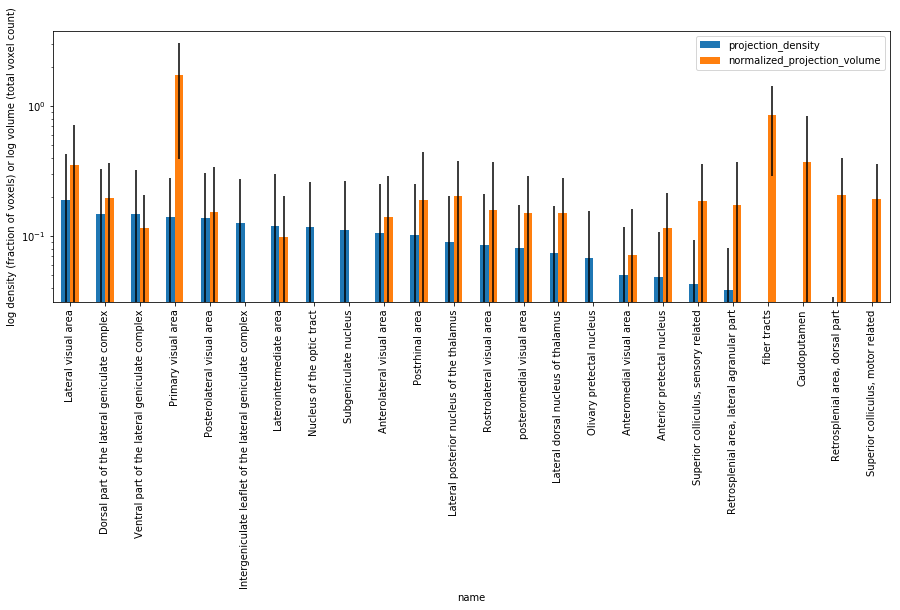

In [61]:
# We can visualize this data with a bar plot
fig = diff.plot.bar('name', 
                    ['projection_density', 'normalized_projection_volume'], 
                    yerr = [wt_proj_density_std[diff['structure_id']], wt_proj_volume_std[diff['structure_id']]],
                    figsize = (15, 5))
fig.set_ylabel('log density (fraction of voxels) or log volume (total voxel count)')
fig.set_yscale('log')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3><center>Ideas for shareable functions</center></h3>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0;">
Write a function to:
<ol><li>Find the top n targets for an input source region</li>
<li>Find the top n sources that project to an input target region (or sources with projections stronger than a specified threshold)</li>
<li>Find the top n differences between two or more experiments</li>
<li>Quantify projection density by layer from a specified source to one or more target regions</li>
<li>Find all experiments within a specified distance of an anchor experiment

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3><center>Project Ideas</center></h3>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FFF0;">
<h4>Projection Patterns</h4>
* What are the pathways through the brain from sensory input to motor output?
* What are the paths through the brain for incoming sensory information of different modalities? Where do they converge?
* Hierarchical streams of cortical processing (for example in the visual cortex) is a successful model in the primate (Felleman and Van Essen). Is there evidence for a similar organization in the mouse (in the connectivity data set)?

<h4>Cell Types</h4>
* Which layers and cre lines have contralateral projections? Does the density of contralateral projections vary by region? How do the targeted contralateral regions differ from targeted ipsilateral regions?
* What do different cell types contribute to the network topology?

<h4>Topology</h4>
* Many brain structures have known cortical projection topography including thalamus, superior colliculus, striatum, and primary motor cortex. Does an informatically-driven structure atlas look different when using projection-as-source data to define regions, as opposed to projection-as target (i.e. is there a difference in topology for incoming and outgoing projections in some regions)?
* What structural motifs are present in the connectivity data set? How do they differ across regions?
* What are the functional correlates to the structural connectivity? How do they relate to models of information processing?
* Starting at a given point in the brain, what are the loop back routes and motifs to traverse the network and return to the same spot?
* If you lose one particular cell type or cre line (say, due to a particular neurodegenerative disease), what happens to the routes and motifs in the rest of the network?